### Libs

In [1]:
# Re-import necessary libraries after kernel reset
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# To work on google colab
# Connect
from google.colab import drive
drive.mount('/content/drive')

# Move to work folder location
%cd /content/drive/MyDrive/Capstone/llm_steam_bot/src/recommender

# Check location
!ls

Mounted at /content/drive
/content/drive/MyDrive/Capstone/llm_steam_bot/src/recommender
collaborative_matrix_based.ipynb    offline_eval_results_20250723_172221.csv
collaborative_memory_based.ipynb    offline_evaluation.py
content_based_recs.py		    Untitled0.ipynb
explore_offline_eval_results.ipynb


### Upload files

In [10]:
# Memory based collaborative metrics
df_memory_based_hit_rate = pd.read_csv('../../data/df_memory_based_hit_rate.csv')
df_memory_based_precision = pd.read_csv('../../data/df_memory_based_precision.csv')
df_memory_based_ndcg = pd.read_csv('../../data/df_memory_based_ndcg.csv')

# Matrix based collaborative metrics
df_matrix_factorization_hit_rate = pd.read_csv('../../data/df_matrix_factorization_hit_rate.csv')
df_matrix_factorization_precision = pd.read_csv('../../data/df_matrix_factorization_precision.csv')
df_matrix_factorization_ndcg = pd.read_csv('../../data/df_matrix_factorization_ndcg.csv')

### Plot function

In [5]:
def plot_offline_eval(df, performance_metric, y_scale_min=0.1):
  df["threshold"] = df["threshold"].astype(str)

  # Plot two subplots side by side without grid and with threshold as string
  fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

  titles = {
      100: f"{performance_metric}@k - Top 100 Games",
      1000: f"{performance_metric}@k - Top 1000 Games"
  }

  for i, total_games in enumerate([100, 1000]):
      ax = axes[i]
      df_subset = df[df["total_games"] == total_games]
      for threshold in sorted(df_subset["threshold"].unique()):
          label = f"threshold={threshold}"
          line = df_subset[df_subset["threshold"] == threshold]
          ax.plot(line["k"], line[performance_metric], marker='o', label=label)
      ax.set_title(titles[total_games])
      ax.set_xlabel("k")
      ax.set_xticks(sorted(df["k"].unique()))
      ax.set_ylim(y_scale_min, 1.0)

  axes[0].set_ylabel(f"{performance_metric}")
  axes[1].legend(title="Threshold", loc='lower right')
  plt.tight_layout()
  plt.show()

### Memory based eval

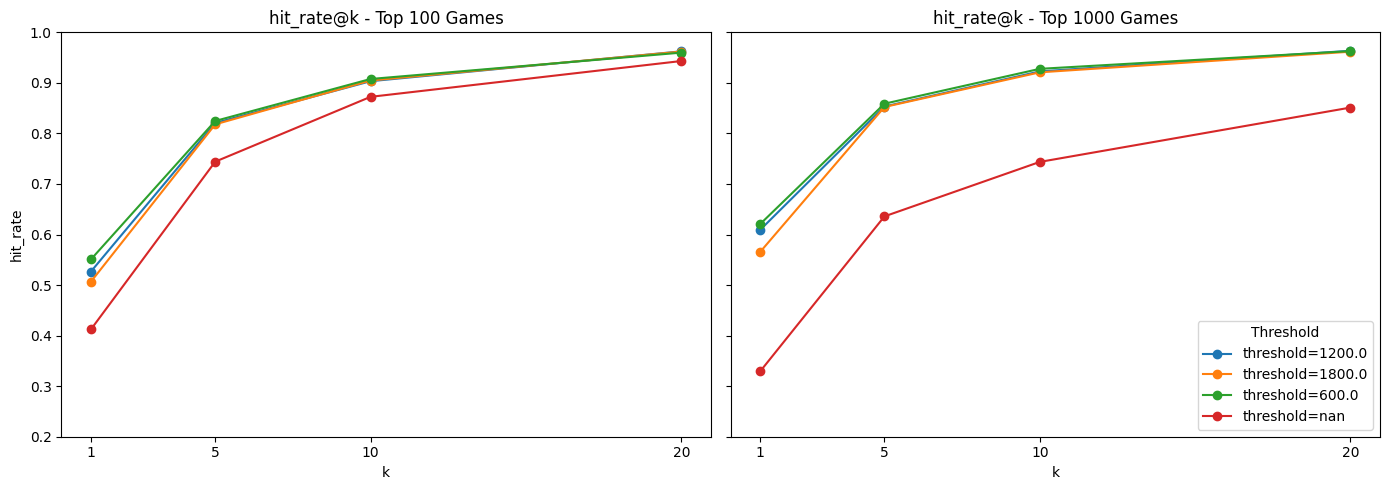

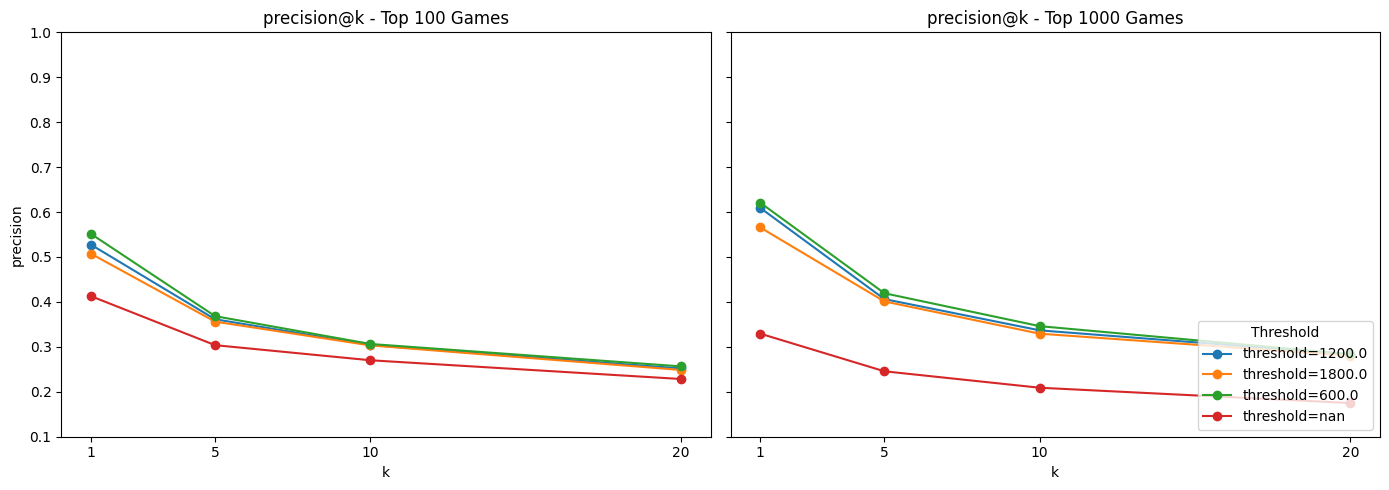

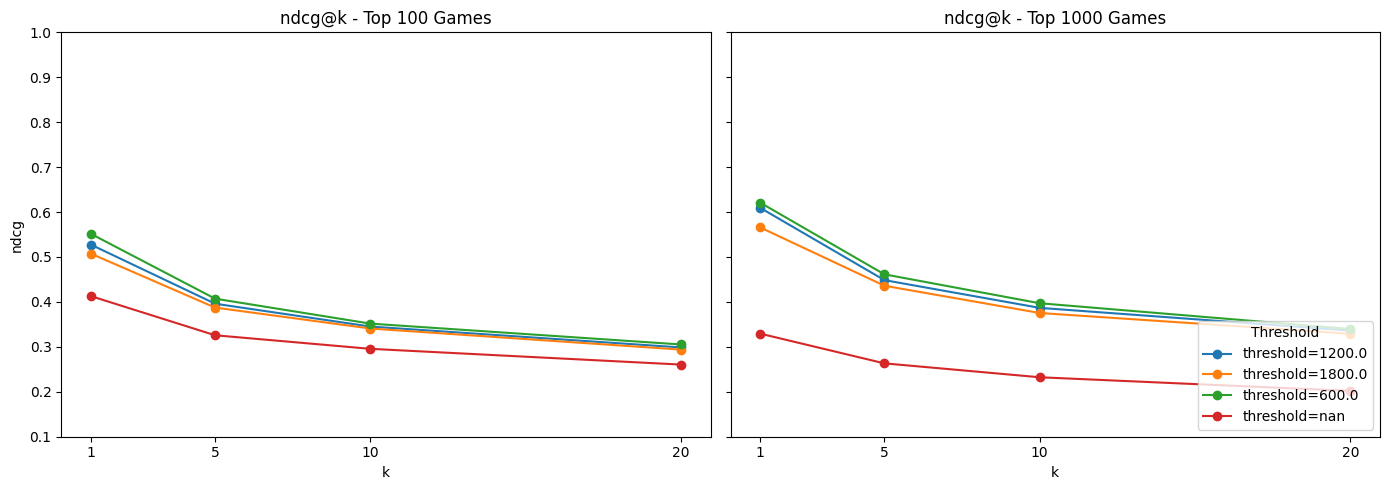

In [9]:
plot_offline_eval(df_memory_based_hit_rate, "hit_rate", 0.2)
plot_offline_eval(df_memory_based_precision, "precision", 0.1)
plot_offline_eval(df_memory_based_ndcg, "ndcg", 0.1)

### Matrix factorization eval

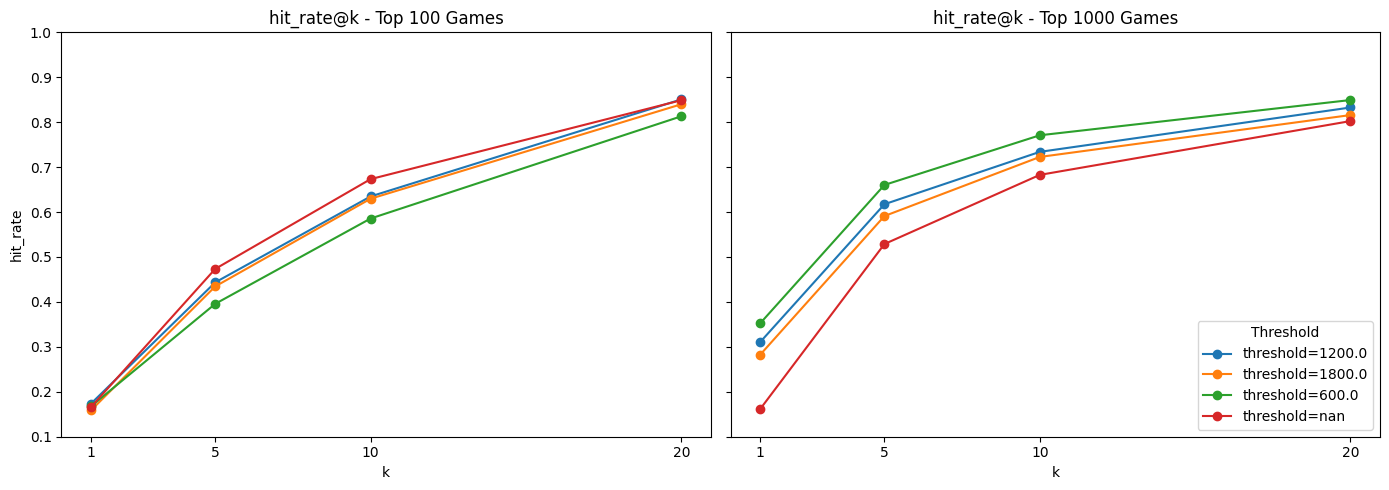

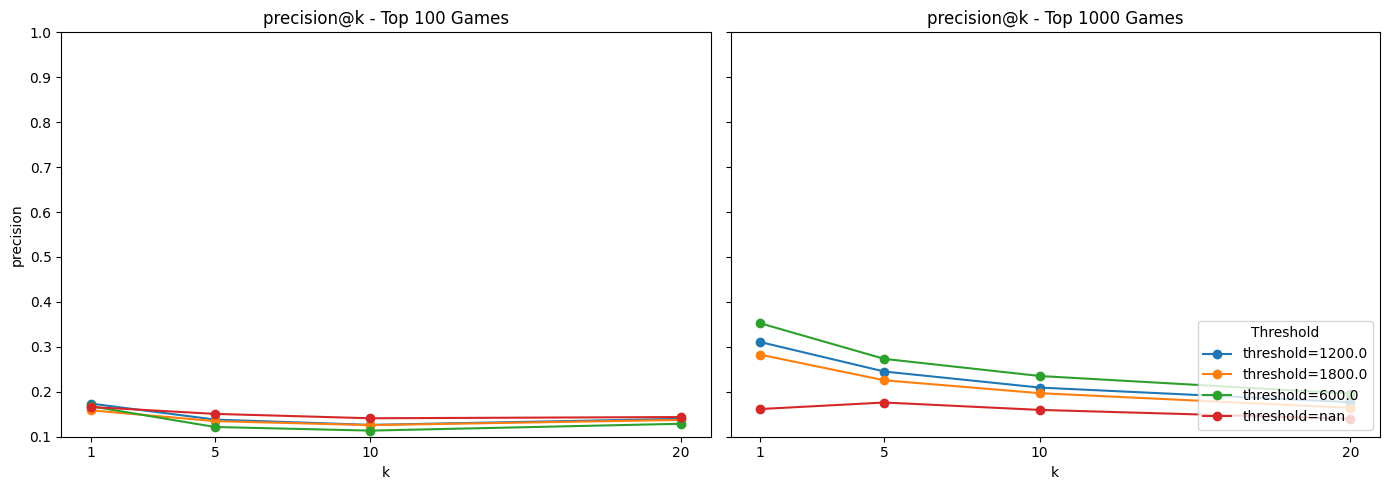

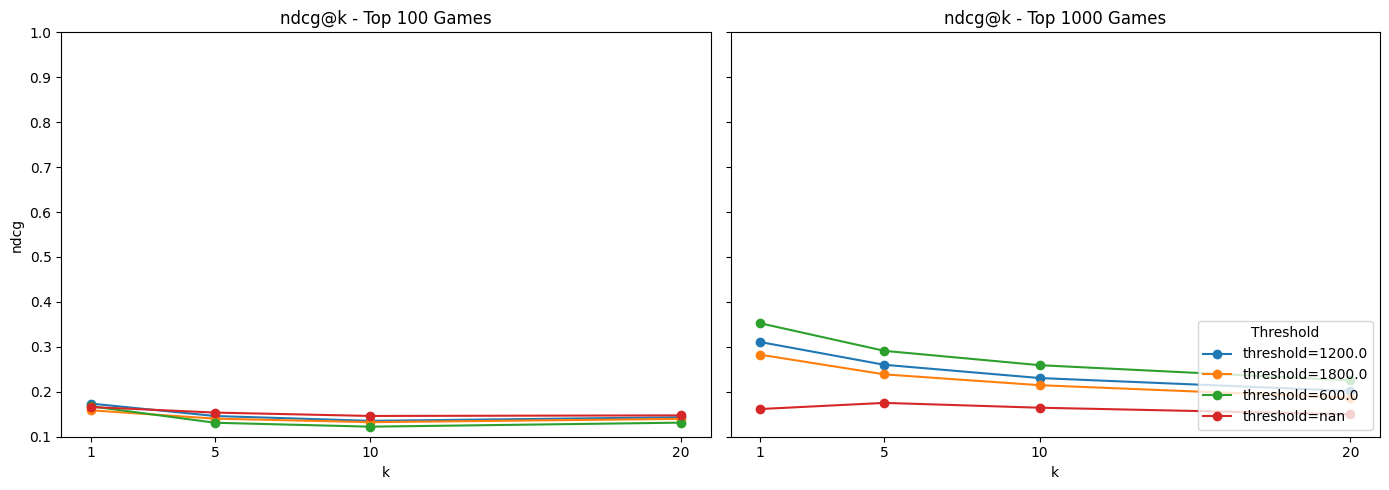

In [13]:
plot_offline_eval(df_matrix_factorization_hit_rate, "hit_rate", 0.1)
plot_offline_eval(df_matrix_factorization_precision, "precision", 0.1)
plot_offline_eval(df_matrix_factorization_ndcg, "ndcg", 0.1)